In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Actualizar los datos (URL)

#url = 'country_wise_latest.csv'
url = 'covid_19_clean_complete.csv'
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## Listamos la fecha, los contagiados y los recueprados de Ecuador

In [3]:
df = df[df['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['Date','Confirmed', 'Recovered']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,Date,Confirmed,Recovered
95,21,0,0
356,22,0,0
617,23,0,0
878,24,0,0
1139,25,0,0
...,...,...,...
47858,204,78148,33455
48119,205,79049,34544
48380,206,80036,34544
48641,207,80694,34896


# Se hace el proceso de los contagiados

<AxesSubplot:xlabel='Date'>

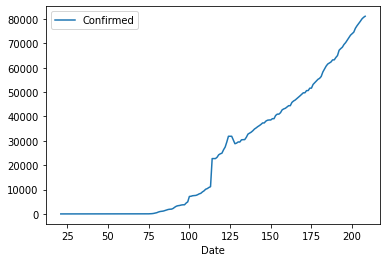

In [4]:
df.plot(x ='Date', y='Confirmed')

## Se entrena para la regresión

In [8]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
z  = list(df.iloc [:, 2]) # Numero de recuperados
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestros modelos
regr.fit(np.array(x).reshape(-1, 1) ,y)

#regr.fit(np.array(x).reshape(-1, 1) ,z)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [451.62530905]
Independent term: 
 -26825.480865331312


## Predecimos

In [12]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 330,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[330]])
print('Se predice que para el mes de Noviembre el número de personas contagiadas será de:')
print(int(y_prediccion))

Se predice que para el mes de Noviembre el número de personas contagiadas será de:
122210


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


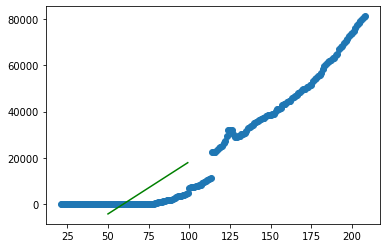

In [10]:

#Graficar
plt.scatter(x, y)
x_real = np.array(range(50, 100))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

# Ahora el mismo proceso pero con los recuperados
## Graficamos la ecuación de los recuperados con respecto al tiempo

<AxesSubplot:xlabel='Date'>

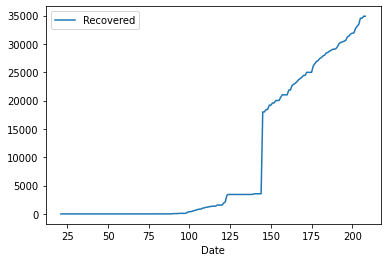

In [13]:
df.plot(x ='Date', y='Recovered')

## Se entrena la regresión

In [15]:
x = list(df.iloc [:, 0]) # Fecha
z  = list(df.iloc [:, 2]) # Numero de recuperados
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 


regr.fit(np.array(x).reshape(-1, 1) ,z)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [199.83446299]
Independent term: 
 -13454.397076432126


## Predecimos cantos recuperados habrá para el día 330

In [18]:
y_prediccion = regr.predict([[330]])
print('Se predice que para el mes de Noviembre el número de personas recupearadas será de:')
print(int(y_prediccion))

Se predice que para el mes de Noviembre el número de personas recupearadas será de:
52490


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


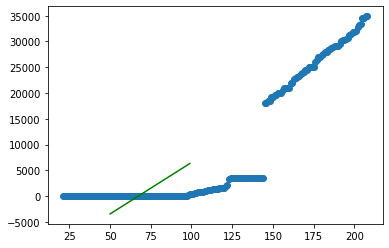

In [19]:
plt.scatter(x, z)
x_real = np.array(range(50, 100))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()